# Machine Learning 

Zhentao Shi


## Introduction

Machine learning and artificial intelligence:

* Technology or alchemy?
* Statistics or biology?

* [Tom Sargent](https://www.project-syndicate.org/commentary/artificial-intelligence-new-economic-models-by-thomas-j-sargent-2019-11)


## Reference

* [ISLR] James, Gareth., Witten, Daniela., Hastie, Trevor., & Tibshirani, Robert. (2017). An introduction to statistical learning.  (Open access at https://www.statlearning.com/)
* [ESL] Friendman, Hastie and Tibshirani (2001, 2008): Elements of Statistical Learning (Open access at https://hastie.su.domains/Papers/ESLII.pdf)

* Athey (2018) 
* Mullainathan and Spiess (2017)

## Supervised Learning

* Connection between $X$ and $Y$
* Regression and classification

A set of data fitting procedures focusing on out-of-sample prediction
* Repeat a scientific experiment for $n$ times and obtain a dataset $(y_i, x_i)_{i=1}^n$.
* How to best predict $y_{n+1}$ given $x_{n+1}$?

# Unsupervised Learning

* Only about $X$
* Density estimation, principal component analysis, and clustering


# Conventional Statistics

* Consistency
* Asymptotic distribution (hopefully normal)
* Efficiency

# Machine Learning's Responses

* Efficiency is mostly irrelevant given big data
* Statistical inference may not be the goal
    * Recommendation system on Amazon or Taobao
    * Care about the prediction accuracy, not the causal link
* Is there a data generating process (DGP)?

# First Generation

## Nonparametric Estimation

* *Parametric*: a finite number of parameters
* *Nonparametric*: an infinite number of parameters

* Some ideas in nonparametric estimation is directly related to machine learning

# Example: Density Estimation

* Density estimation given a sample $(x_1,\ldots,x_n)$
* If drawn from a parametric family, MLE for estimation
* Misspecification 

* Histogram is nonparametric
    * If grid too fine, small bias but large variance
    * If grid too coarse, small variance but large bias
    

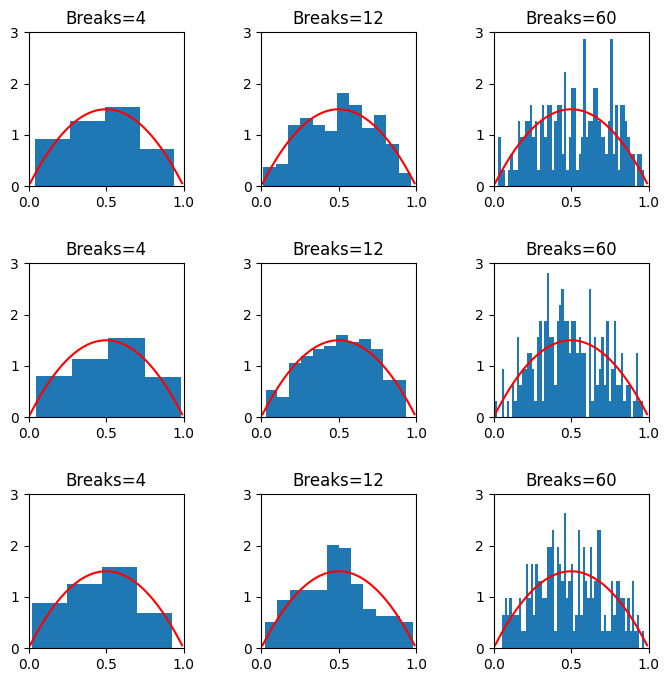

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

n = 200
x_base = np.arange(0.01, 1, 0.01)
breaks_list = [4, 12, 60]

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(8, 8)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axs.flat):
    ii = i // 3
    bb = breaks_list[i % 3]
    x = np.random.beta(2, 2, size=n)
    ax.hist(x, bins=bb, density=True)
    ax.plot(x_base, beta.pdf(x_base, 2, 2), color="red")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3)
    ax.set_title(f"Breaks={bb}")

plt.show()




## Variance-Bias Tradeoff

![](graph/bias_variance.png)

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

# Series Estimation

* Series expansion to approximate $f(x)$
* Generates many additive regressors
    * Ex: bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$.
    * In finite sample, choose a finite $K$, usually much smaller than $n$
    * Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

* Bias-variance trade-off
    * Big $K$: small bias and large variance 
    * Small $K$: small variance and large bias

# Penalization

* Specify a sufficiently large $K$, and then add a penalty term to control the complexity
* Eg: *Ridge regression*: 
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. 

In compact notation, let $Y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2
$$

# Tuning Parameter

* *Information criterion*: AIC, BIC
* *Cross validation*


* Active statistical research, but has little economics

# Econometrics Workflow

![](graph/metric_flow.png)

## Data Splitting

![ ](graph/ML_flow.png)

## Data Splitting


* Machine learning's main purpose is often prediction
* Agnostic about the DGP.
* Models are measured by their performance in prediction.
* Tuning.

* Training dataset
* Validation dataset

* Testing sample

# `Caret` Package

* R package `caret` (Classification And REgression Training): a framework for many machine learning methods
* The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross sectional data and time series.

### Cross Validation (cross sectional data)

* $S$-fold cross validation partitions the dataset into $S$ disjoint sections
* Each iteration picks one of the sections as the (quasi) validation sample
* The other $S-1$ sections as the training sample.
* Compute an out-of-sample goodness-of-fit measurement

### Goodness of Fit (Out of Sample)

* *Mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality, 
* *Mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. 
* *Out of sample R-squared* (OOS $R^2$):

$$
1 - \frac{{n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2}{{n_v}^{-1} \sum_{i \in val} y_i^2}
$$

* Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, 
* Average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. 
* In practice we can use  $S=5$ for 10

### Cross Validation (time series data)

* In time series context, cross validation must preserve the dependence structure. 
* If the time series is stationary, we can partition the data into $S$ consecutive blocks. 

(i will skip this slide)

* If the purpose is forecasting, then we can use nested CV. 
![ ](graph/CV_Figure.png)

* Nested CV with fixed-length rolling window scheme
* The sub-training data can also be an extending rolling window.

## Variable Selection

* Number of covariates $x_i$ can be large.

* Conventional attitude: prior knowledge
* Recently economists wake up from the long lasting negligence.
    * Stock and Watson (2012): forecasting 143 US macroeconomic indicators.
    * A horse race of several variable selection methods.

# Lasso

* least-absolute-shrinkage-and-selection-operator
(Lasso) (Tibshirani, 1996)
* Penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. 

Lasso shrinks some coefficients exactly to 0, in a wide range of values of $\lambda$


![ ](graph/lasso_regression2.png)

# SCAD

* Smoothly-clipped-absolute-deviation (SCAD) Fan and Li (2001):
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. 

* SCAD enjoys *oracle property*. 


# Adaptive Lasso

*Adaptive Lasso* (Zou, 2006) also enjoys the oracle property.

Two-step algorithm:
1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$
2. Solve 
$(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|$
where $w_j = 1 /  |\hat{\beta}_j^{(1)} |^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).

* Lee, Shi and Gao (2022)

### There are no packages for adaptive lasso in python like "glmnet" in R

We can only use CVXPY to DIY

### DIY Lasso by `CVXPY`. 

In [5]:
import numpy as np
import cvxpy as cp
from sklearn.linear_model import LassoCV

# Set the seed for reproducibility
np.random.seed(0)

n = 40
p = 50
b0 = np.concatenate([np.ones(10), np.zeros(p - 10)])
x = np.random.normal(size=(n, p))
y = np.dot(x, b0) + np.random.normal(size=n)

# Implement Lasso with scikit-learn's LassoCV
cv_lasso = LassoCV(cv=10).fit(x, y)

# CVXPY for Lasso
lambda_ = 2 * cv_lasso.alpha_ # tuning parameter
beta_cvxpy = cp.Variable(p)
objective = cp.Minimize(cp.sum_squares(y - x @ beta_cvxpy) / (2 * n) + lambda_ * cp.norm1(beta_cvxpy))
prob = cp.Problem(objective)
lasso_cvxpy = prob.solve()
beta_cvxpy_hat = beta_cvxpy.value
print(beta_cvxpy_hat)




[ 6.52907099e-01  6.17708652e-01  4.13631999e-01  7.43743319e-01
  1.02938829e+00  7.46934042e-01  9.83405074e-01  9.73991752e-01
  7.40835374e-01  4.54137771e-01 -3.11365481e-22  4.24940209e-22
 -5.17113965e-02  2.89281874e-02  8.09825170e-03 -1.03444670e-21
  3.77356467e-01 -4.06040096e-22  8.55892323e-23 -3.14639127e-22
  2.08738588e-22  3.90371986e-22 -2.92895853e-02 -6.89324786e-22
  3.80169075e-22  1.33156001e-01 -1.10582078e-21  1.82716312e-01
  9.13197370e-03 -8.40562225e-02 -8.65597707e-22  1.07017312e-01
 -6.69946780e-23  2.16611284e-01 -6.38520431e-23 -3.78083307e-22
 -4.28759063e-23 -2.84577530e-22  1.04499236e-01 -3.53487834e-22
 -1.60628551e-01 -6.59451934e-02 -3.11534636e-23  3.29759277e-02
  1.24568065e-01 -2.93964461e-01  5.12536781e-22 -2.09868916e-01
 -1.80747211e-01  9.76488439e-23]


# Stagewise Forward Selection

More methods are available if prediction of the response variables is the sole purpose of the regression.

Eg: *stagewise forward selection*

1. Start from an empty model. 
2. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. 

Close to the idea of *$L_2$ componentwise boosting*
which does not adjust the coefficients fitted earlier

* Shi and Huang (2023)

# Second Generation

# Prediction-Oriented Methods

* Methods that induces data-driven interaction of the covariates.
* Interaction makes the covariates much more flexible
* Insufficient theoretical understanding
* "Black-boxes" methods

* Surprisingly superior performance
* Industry insiders are pondering "alchemy"

# Regression Tree

* Supervised learning: $x \to y $
* Regression tree (Breiman, 1984) recursively partitions the space of the regressors
    * Each time a covariate is split into two dummies
    * Splitting criterion is aggressive reduction of the SSR
    * Tuning parameter is the depth of the tree
    * Given a dataset $d$ and the depth of the tree, the fitted tree $\hat{r}(d)$ is deterministic

- Example: Using longitude and latitude for Beijing housing price.

# Bagging

* Tree is unstable
* *Bootstrap averaging*, or *bagging*, reduces variance of trees (Breiman, 1996)
    * Grow a tree for each bootstrap sample
    * Simple average

* An example of the *ensemble learning*.

* Inoue and Kilian (2008): an early application of bagging in time series forecast.
* Hirano and Wright (2017): a theoretical perspective on the risk reduction of bagging.

# Random Forest

* *Random forest* (Breiman, 2001):
    * Draw a bootstrap sample
    * Before each split, shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites. Stop until the depth of the tree is reached.
    * Average the trees over the bootstrap samples
    
* The tuning parameters are the tree depth and $m$
* More stable than bagging thanks to "de-correlation"

### Because the dataset of Boston doesn't work well in python, so I switch to california_housing

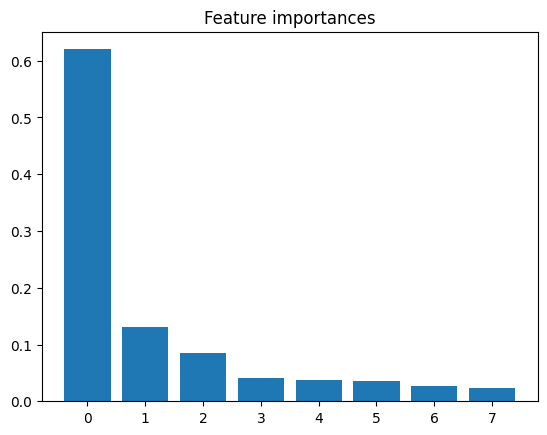

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# training Sample with 300 observations
train_indices = np.random.choice(np.arange(len(y)), size=300, replace=False)

# Fit Random Forest model
rf = RandomForestRegressor(n_estimators=500, random_state=101)
rf.fit(X[train_indices], y[train_indices])

# Plot feature importances
feat_importances = rf.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feat_importances[indices])
plt.show()

* Consistency of random forest is not proved
until Scornet, Biau, and Vert (2015)
* Inferential theory was first established by
Wager Athey (2018)  in the context of treatment effect estimation
* Athey, Tibshirani, and Wager (2019) generalizes CART to local maximum likelihood.

## Gradient Boosting

* Bagging and random forest use equal weight on each generated tree for the ensemble
* Tree boosting takes a deterministic approach for the weights
    1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
   $\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
   the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
    2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
   the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
    3. Repeat Step 2 until $m > M$.

* Boosting has three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$
* The algorithm can be sensitive to any of the three tuning parameters
* When a model is tuned well, it can performs remarkably
    * Example: Beijing housing data.
    * Gradient boosting via the package `gbm`

## Real Data Example

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Load the data
lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')

# Sampling with a seed for reproducibility
lianjia = lianjia.sample(frac=0.05, random_state=1)

train_data, test_data = train_test_split(lianjia, test_size=0.9, random_state=1)

train_ind = train_data.index

# Define the hyperparameters
param_grid = {
    'max_depth': [10, 40],  # equivalent to interaction.depth in R's gbm
    'n_estimators': [1000, 5000, 9000],  # equivalent to n.trees
    'learning_rate': [0.01],  # equivalent to shrinkage
    'min_samples_leaf': [20],  # equivalent to n.minobsinnode
}

# Create a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)

C:\Users\zhent\AppData\Local\Temp\ipykernel_20156\608267562.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')


In [10]:
predictors = ["square", "livingRoom", "drawingRoom", "kitchen", "bathRoom",
              "floor_total", "elevator", "ladderRatio",
              "age", "DOM", "followers", "fiveYearsProperty",
              "subway", "district", "Lng", "Lat", "t_trade",
              "communityAverage"]

# Your target variable
target = 'price'

# Prepare your predictor and target datasets
X = lianjia[predictors]
y = lianjia[target]

In [11]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Specify the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Create the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(loss='squared_error', random_state=0)

# Start the timer
start_time = time.time()

# Perform grid search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Calculate the time taken
end_time = time.time()
duration = end_time - start_time

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)
print("Time taken:", duration, "seconds")



Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Score: 36109845.60513804
Time taken: 114.57822823524475 seconds


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gbm.fit(X_train, y_train)

# Predict with GBM model
pred_boosting = gbm.predict(X_test)

# Fit the linear regression model
lmReg = LinearRegression()
lmReg.fit(X_train, y_train)

# Predict with linear regression model
pred_lm = lmReg.predict(X_test)

# Comparison
r_squared_gbm = r2_score(y_test, pred_boosting)
r_squared_lm = r2_score(y_test, pred_lm)

print("R-squared of GBM prediction =", r_squared_gbm)
print("R-squared of LM prediction =", r_squared_lm)

R-squared of GBM prediction = 0.9274916178262405
R-squared of LM prediction = 0.837210933830932


* Many variants of boosting algorithms
    * $L_2$-boosting
    * componentwise boosting
    * AdaBoosting, etc

## Neural Network

* Artificial neural network (ANN) is the workhorse behind Alpha-Go and self-driven cars
* A particular type of nonlinear models.

![ANN](graph/Colored_neural_network.png)

* The transition from layer $k-1$ to layer $k$ can be written as

$$
\begin{align*}
z_l^{(k)} & = w_{l0}^{(k-1)} + \sum_{j=1}^{p_{k-1} } w_{lj}^{(k-1)} a_j^{(k-1)} \\ 
a_l^{(k)} & = g^{(k)} ( z_l^{(k)})
\end{align*}
$$

where $a_j^{(0)} = x_j$ is the input.

* The latent variable $z_l^{(k)}$ usually takes a linear form
* *Activation function* $g(\cdot)$ is usually a simple nonlinear function
* Popular choice: sigmoid ($1/(1+\exp(-x))$); ReLu, $z\cdot 1\{x\geq 0\}$

A user has several decisions to make
* Activation function
* Number of hidden layers
* Number of nodes in each layer


* Many free parameters are generated from the multiple layer and multiple nodes
* In estimation often regularization methods are employed to penalize
the $l_1$ and/or $l_2$ norms, which requires extra tuning parameters

#  Theory is Underdeveloped

* Theoretical understanding about its behavior is scant
* Hornik, Stinchcombe, and White (1989):
    * A single hidden layer neural network, given enough many nodes, is a *universal approximator* for any
measurable function.

# Computation

* Free parameters must be determined by
numerical optimization
* Nonlinear complex structure makes the optimization
very challenging and the global optimizer is beyond guarantee
* De facto optimization algorithm
is *stochastic gradient descent*

* Google's `tensorflow`
* `keras` is the deep learning modeling language

## Stochastic Gradient Descent (SGD)

* In optimization the update formula

$$
\beta_{k+1} = \beta_{k} + a_k p_k,
$$
  
  * step length $a_k \in \mathbb{R}$ 
  * vector direction $p_k$

* Talyor expansion,
$$
f(\beta_{k+1}) = f(\beta_k + a_k p_k ) \approx f(\beta_k) + a_k \nabla f(\beta_k) p_k,
$$

* Choose $p_k$ to reduce $f(x)$ 
* A simple choice is $p_k =-\nabla f(\beta_k)$.

c.f.:
* Newton's method:$p_k =- (\nabla^2 f(\beta_k))^{-1}  \nabla f(\beta_k)$
* BFGS uses a low-rank matrix to approximate $\nabla^2 f(\beta_k)$

* When sample size and/or number of parameter is big, prohibitively expensive to evaluate gradient
* SGD uses a small batch of the sample to evaluate the gradient in each iteration. 

* SGD involves tuning parameters 
  * say, batch size
  * learning rate

* Careful experiments must be carried out before serious implementation.

### Experiment

Use SGD in the PPMLE
* sample size 100,000
* the number of parameters 100

# Summary

* Mature algorithms for implementation
* Theoretical investigation is in progress
* Economic applications are emerging